In [26]:
import numpy as np
import random

In [27]:
def EstimateCorrespondences(X,Y,t,R,dmax):
    X = np.array(X)
    Y = np.array(Y)
    C =[]
    for i in range (len(X)):
        translation = (R.dot(X[i]) + t)
        y = (Y - translation)
        y_norm = np.linalg.norm(y,axis=1)
        y_min_index = np.argmin(y_norm)
        if(y_norm[y_min_index]<dmax):
            C.append((i,y_min_index))
    return np.array(C)

# def EstimateCorrespondences(pointCloudX, pointCloudY, translation, rotation, dMax):
#     outputArray = []
    
#     for i in range(len(pointCloudX)):
#         distances = []
#         xTransformation = rotation.dot(pointCloudX[i]) + translation
        
#         for j in range(len(pointCloudY)):
#             distances.append((np.linalg.norm(pointCloudY[j] - xTransformation))**2)

#         indexMin = np.argmin(distances)

#         if (distances[indexMin] < dMax):
#             outputArray.append((i, indexMin))
            
#     return outputArray

In [28]:
def ComputeOptimalPointRegistration(pointCloudX, pointCloudY, correspondences):
    correspondingX = []
    correspondingY = []
    size = len(correspondences)

    for pair in correspondences:
        correspondingX.append(pointCloudX[pair[0]])
        correspondingY.append(pointCloudY[pair[1]])
    
    centroidX = np.mean(correspondingX , axis=0)
    centroidY = np.mean(correspondingY, axis=0)

    deviationsX = correspondingX - centroidX
    deviationsY = correspondingY - centroidY


    crossCovarience = (deviationsY.T.dot(deviationsX)) / size

    U, E, Vt = np.linalg.svd(crossCovarience)

    rotation = U.dot(Vt)
    
    translation = centroidY.T - rotation.dot(centroidX.T)

    return rotation, translation

In [29]:
def ICP(pointCloudX, pointCloudY, t_0, R_0, dMax, iterations):
    t = t_0
    R = R_0

    for i in range(iterations):
        print("iterations:"+str(i+1))
        correspondences = EstimateCorrespondences(pointCloudY, pointCloudX, t, R, dMax)
        R, t = ComputeOptimalPointRegistration(pointCloudX, pointCloudY, correspondences)

    return (correspondences, R, t)

In [31]:
pointCloudX = np.loadtxt("pclX.txt")
pointCloudY = np.loadtxt("pclY.txt")

# randomX = np.loadtxt("pclX_small.txt")
# randomY = np.loadtxt("pclY_small.txt")

randomX = []
randomY = []
numSamples = len(pointCloudX)

for i in range(500):
    randomNum = random.randint(0, numSamples - 1)
    randomX.append(pointCloudX[randomNum])
    randomY.append(pointCloudY[randomNum])

randomX = np.array(randomX)
randomY = np.array(randomY)

initial_t = np.array([0,0,0])
initial_R = np.array([[1,0,0],[0,1,0],[0,0,1]])
dMax = 0.25
num_iterations = 25


C, R, t = ICP(randomX, randomY , initial_t, initial_R, dMax, num_iterations)

iterations:1
iterations:2
iterations:3
iterations:4
iterations:5
iterations:6
iterations:7
iterations:8
iterations:9
iterations:10


/var/folders/d_/_crg6xj94p75vsn3xkk2s8d40000gn/T/ipykernel_49630/2593668388.py:17: RuntimeWarning: invalid value encountered in double_scalars
  crossCovarience = (deviationsY.T.dot(deviationsX)) / size


LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

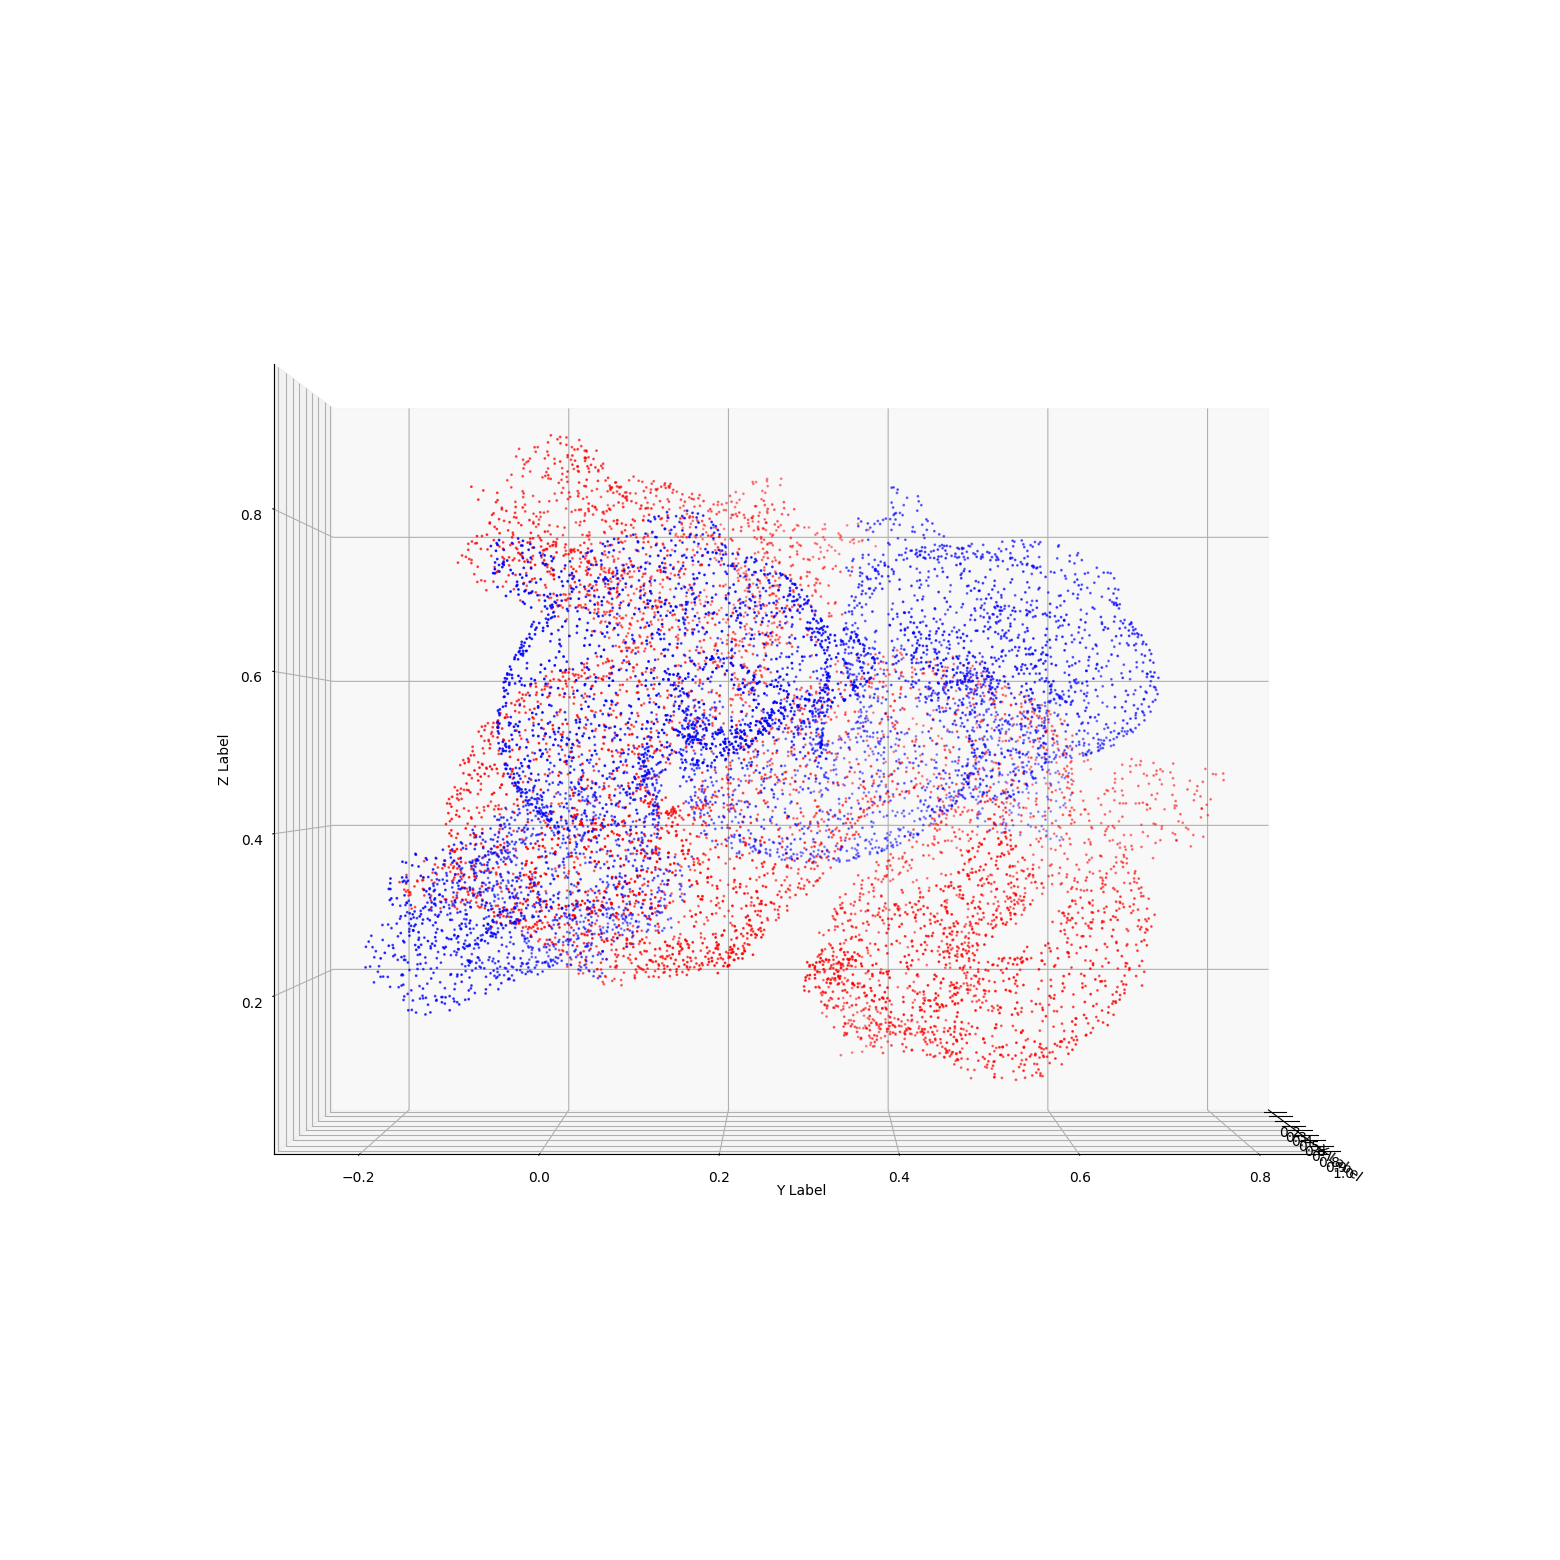

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

newPoints = []

pointCloudX = np.loadtxt("pclX.txt")
pointCloudY = np.loadtxt("pclY.txt")

# pointCloudX = randomX
# pointCloudY = randomY

for point in pointCloudX:
    newPoint = R.dot(point.T) + t
    newPoints.append(newPoint)

dataframeY = pd.DataFrame(pointCloudY, columns=["x","y","z"])
dataframeNewX = pd.DataFrame(newPoints, columns=["x","y","z"])
dataframeX = pd.DataFrame(pointCloudX, columns=["x","y","z"])

ax.scatter3D(dataframeY["x"], dataframeY["y"], dataframeY["z"], c='r', s=1)
ax.scatter3D(dataframeNewX["x"], dataframeNewX["y"], dataframeNewX["z"],c='b', s=1)
# ax.scatter3D(dataframeX["x"], dataframeX["y"], dataframeX["z"], c='g', s=1)

# for index in range(len(pointCloudY)):
#     ax.scatter3D(pointCloudY[index][0], pointCloudY[index][1], pointCloudY[index][2],c='b', s=2)
#     ax.scatter3D(pointCloudX[index][0], pointCloudX[index][1], pointCloudX[index][2],c='r', s=2)
#     ax.scatter3D(newPoints[index][0], newPoints[index][1], newPoints[index][2],c='g', s=2)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(0,0)

In [ ]:
size = len(C)
rmseSum = 0

for pair in C:
    xTransformation = np.matmul(R,pair[0]) + t
    rmseSum += (np.linalg.norm(pair[1] - pair[0]))**2

RMSE = (rmseSum/size)**0.5
RMSE

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
# testPoints1 = np.array([[0.1,0.4,0.5],[0.2,0.3,0.8],[0.3,0.1,0.9],[0.6,0.9,0.7],[0.2,0.3,0.4,],[0.6,0.2,0.9],[0.5,0.4,0.7],[0.2,0.2,0.2],[0.6,0.6,0.6],[0.9,0.9,0.9]])
# testRotation = np.array([[-0.25,0.47,0.79],[-0.91,0.04,-0.21],[0.33,-0.03,0.19]])
# testTranslation = np.array([[0.3,-0.2,0.2]])

# testPoints2 = testPoints1 @ testRotation + testTranslation

In [ ]:
# M1 = [[1,2,3],[4,5,6],[7,8,9]]
# M2 = [[9,8,7],[6,5,4],[3,2,1]]

# M1 = np.array(M1)
# M2 = np.array(M2)

# result1 = M1 @ M2.T
# result2 = M1.T @ M1

# result1


In [ ]:
# testC, testR, testT = ICP(testPoints1,testPoints2, initial_t,initial_R,0.4, 1000) 

In [ ]:
# testR

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# newPoints = []

# for point in testPoints1:
#     newPoint = point @ testR + testT
#     newPoints.append(newPoint)

# for index in range(len(testPoints1)):
#     ax.scatter(testPoints1[index][0], testPoints1[index][1], testPoints1[index][2],c='b', s=2)
#     ax.scatter(testPoints2[index][0], testPoints2[index][1], testPoints2[index][2],c='r', s=2)
#     ax.scatter(newPoints[index][0], newPoints[index][1], newPoints[index][2],c='g', s=2)

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.show()